### numpy correlation

In [ ]:
# Used on data loaded from scikit lib
iris_data.DESCR

In [ ]:
# Extracting the duplicate rows
iris.loc[iris.duplicated(), :]

In [ ]:
# 25th percentile
Q1 = iris.groupby('species').quantile(0.25)
print (Q1)


# 75th percentile
Q3 = iris.groupby('species').quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

In [ ]:
percentile = iris.groupby('species').quantile([0.25, 0.75])
print (percentile)

In [ ]:
# isolating the setosa specie

iris_setosa = iris_species.get_group('setosa')
print(iris_setosa)

In [ ]:
 iris_species.get_group('setosa').select_dtypes(include=['float64'])

In [ ]:
for species in iris['species'].unique():
    species_data = iris[iris['species'] == species]
    for feature in iris.columns[:-1]:
        outliers = IQR_outlier(species_data[feature])
        outlier_counts.at[species, feature] = outliers.count()


In [ ]:
 return outliers.dropna(how='all')  # Drop rows where all elements are not a number(NAN)

In [ ]:
# Isolating the versicolor group and finding the outliers count 
versicolor_outliers =  iris_species.get_group('versicolor').select_dtypes(include=['float64']).apply(IQR_outlier)
print (versicolor_outliers.count())

sepal_length    0
sepal_width     0
petal_length    1
petal_width     0
dtype: int64


In [ ]:
# Selecting the numerical columns for each group
setosa =iris_species.get_group('setosa').select_dtypes(include=['float64'])
versicolor =iris_species.get_group('versicolor').select_dtypes(include=['float64'])
virginica =iris_species.get_group('virginica').select_dtypes(include=['float64'])



In [ ]:
#removing the outliers
iris_species.drop(index=species_outliers, inplace=True)
print (iris_species.shape)

AttributeError: 'DataFrameGroupBy' object has no attribute 'drop'

In [ ]:
#detecting outliers in the iris dataset for each specie using pandas groupby 
ispecie = iris.groupby('species').count()
print (ispecie)
iz = ispecie[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
print (iz)
iz = stats.zscore(ispecie).transform(lambda x: (x - x.mean()) / x.std())
outliers = (iz > 3) | (iz < -3)
print(outliers)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa                50           50            50           50
versicolor            50           50            50           50
virginica             50           50            50           50
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa                50           50            50           50
versicolor            50           50            50           50
virginica             50           50            50           50
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             False        False         False        False
versicolor         False        False         False        False
virginica          False        False         False        False


In [ ]:
# Summary descriptives for each of the iris species
iris.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [ ]:
# Find rows containing outliers in any feature
outliers_any = outliers.any(axis=1)

0.9628654314027961


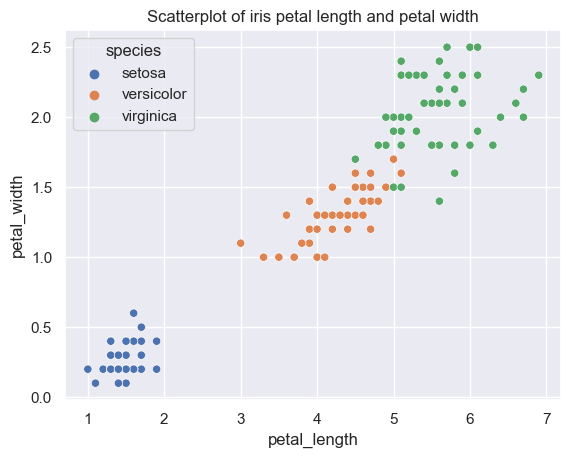

In [ ]:
# creating the scatterplot of body mass vs flipper length
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

plt.title ('Scatterplot of iris petal length and petal width')

#calculating the correlation coefficient
plen_pwidth_corr  = iris['petal_length'].corr(iris['petal_width'])
print (plen_pwidth_corr)


<Axes: xlabel='species', ylabel='petal_width'>

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


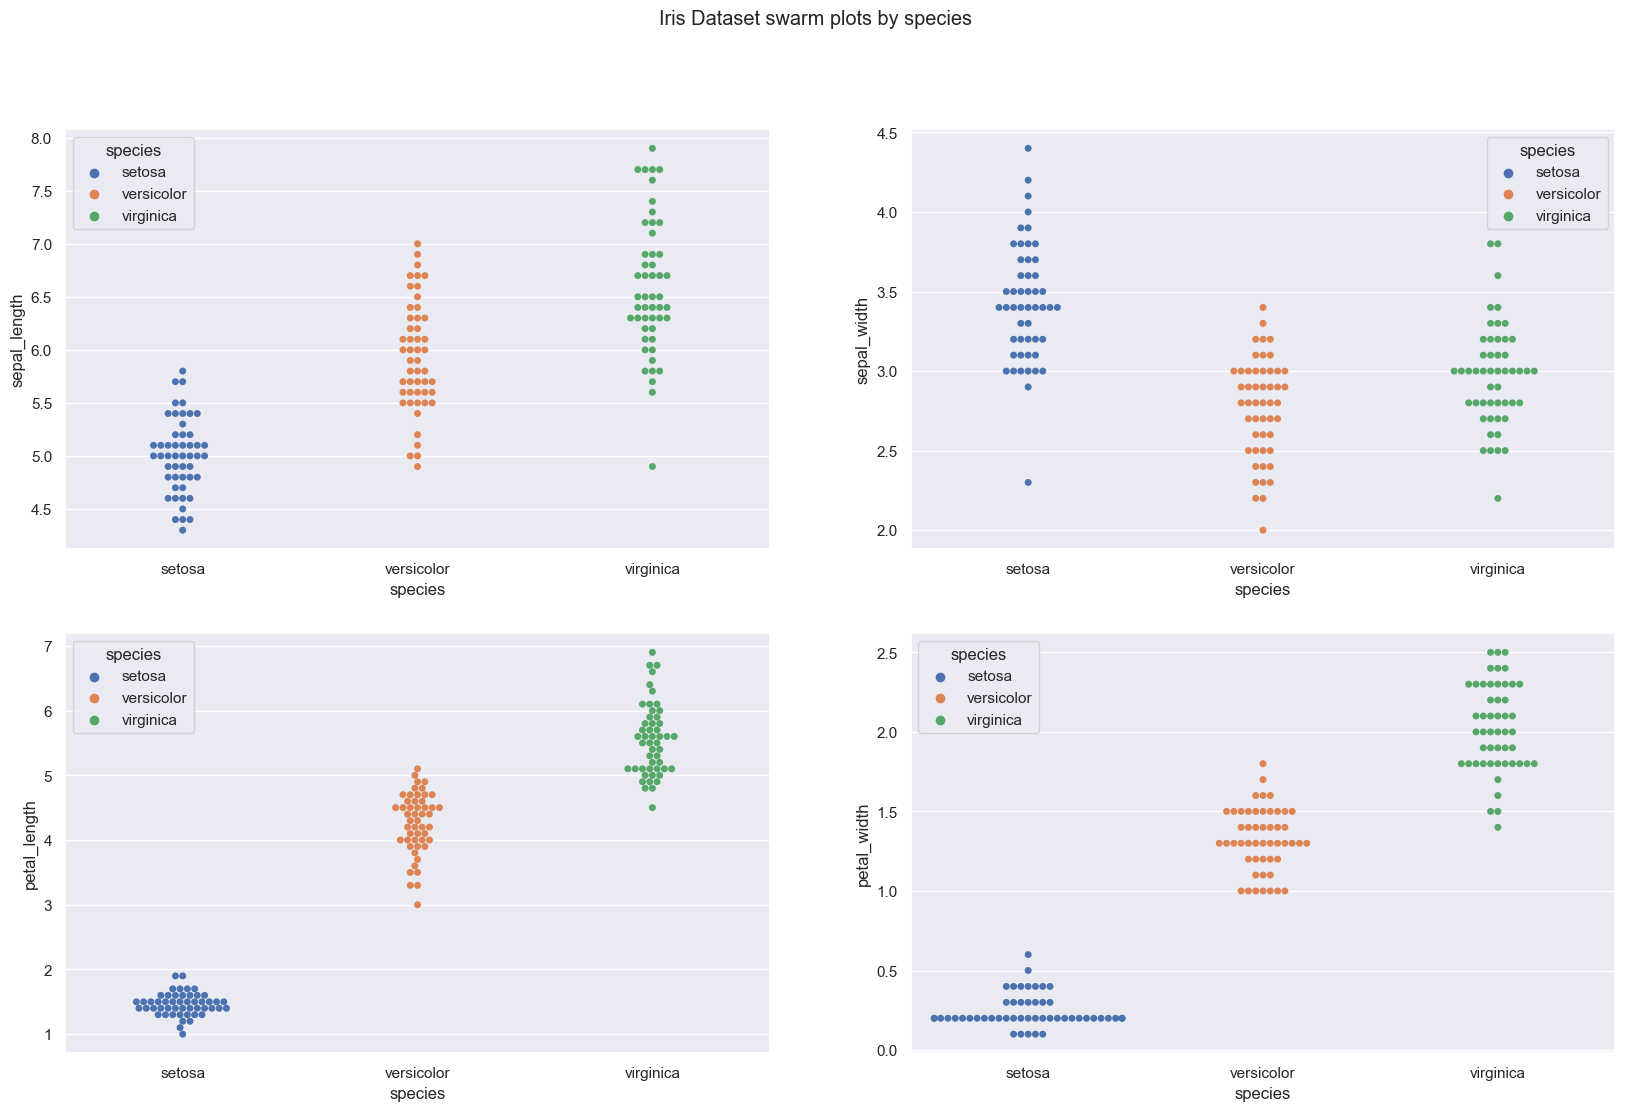

In [ ]:
# Plotting a swarm[plot by species]
fig, ax = plt.subplots(2, 2, figsize = (20, 12))
fig.suptitle ('Iris Dataset swarm plots by species')

#creating chart for each subplot
sns.swarmplot(data=iris_data, y='sepal_length', x ='species', hue ='species', ax = ax [0, 0])
sns.swarmplot(data=iris_data, y='sepal_width',  x ='species', hue ='species', ax = ax [0, 1])
sns.swarmplot(data=iris_data, y='petal_length', x ='species', hue ='species', ax = ax [1, 0])
sns.swarmplot(data=iris_data, y='petal_width',  x ='species', hue ='species', ax = ax [1, 1])

In [ ]:
# Scatterplots with the outliers removed
fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins Dataset Box plots excluding outliers')

#plotting each subplots
#plot 1: row 1, column 1
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', ax = ax [0, 0])


#plot 2: row 1, column 2
sns.boxplot(data=penguins, x='species', y='bill_depth_mm', showfliers = False,ax = ax [0, 1])

#plot 3: row 2, column 1
sns.boxplot(data=penguins, x='species', y='flipper_length_mm', showfliers = False, ax = ax [1, 0])

#plot 4: row 2, column 2
sns.boxplot(data=penguins, x='species', y='body_mass_g', showfliers = False, ax = ax [1, 1])